In [2]:
import pod5
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/NEMO/src/')
import importlib
from qc import *

### modification score distribution

In [124]:
nuclei_neg_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240911_dorado_220308_ang_0.tsv'
nuclei_pos_pred = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240911_dorado_220308_ang_500.tsv'
nulcei_chrom_190429 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240905_dorado_20190429_chrom_normalized.tsv'
nulcei_chrom_190815 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_20190819_chrom.tsv'
nulcei_chrom_210615 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_20210615_chrom_0.4.tsv'
nulcei_chrom_220331 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_20220331_chrom.tsv'

In [132]:
allpred = [nuclei_neg_pred, nuclei_pos_pred, nulcei_chrom_220331, nulcei_chrom_210615, nulcei_chrom_190815, nulcei_chrom_190429]
labels = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 220331', 'nuclei chromatin 210615', 'nuclei chromatin 190815', 'nuclei chromatin 190429']

In [126]:
all_mod_scores = []
for i in range(len(allpred)):
    mod_scores = []
    with open(allpred[i], 'r') as infile:
        for line in tqdm(infile):
            readname = line.strip().split('\t')[0]
            start = line.strip().split('\t')[3]
            scores = line.strip().split('\t')[-1]
            scores = [float(i) for i in scores.split(',')]
            mod_scores.append(np.mean(scores))
    all_mod_scores.append(mod_scores)

36865it [01:29, 413.10it/s] 
40196it [01:05, 614.40it/s] 
61818it [03:07, 329.20it/s]
522794it [02:19, 3751.83it/s]
21646it [00:18, 1152.34it/s]
58289it [01:55, 504.20it/s] 


In [129]:
dt_outpath = '../data/'
fig_outpath = '../figures/'

In [133]:
plt.figure(figsize=(6, 4))
for i in tqdm(range(len(all_mod_scores))):
    print(labels[i])
    plt.hist(all_mod_scores[i], np.arange(0,256, 1), label= labels[i], alpha = 0.6, density = True)
plt.xlabel('predicted modification score')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'3_all_modification_score_distribution.pdf', bbox_inches='tight')
plt.close()

  0%|                                                                                                             | 0/6 [00:00<?, ?it/s]

nuclei negative ctrl


 17%|████████████████▊                                                                                    | 1/6 [00:00<00:02,  2.44it/s]

nuclei positive ctrl


 33%|█████████████████████████████████▋                                                                   | 2/6 [00:00<00:01,  2.64it/s]

nuclei chromatin 220331


 50%|██████████████████████████████████████████████████▌                                                  | 3/6 [00:01<00:01,  2.46it/s]

nuclei chromatin 210615


 67%|███████████████████████████████████████████████████████████████████▎                                 | 4/6 [00:02<00:01,  1.09it/s]

nuclei chromatin 190815


 83%|████████████████████████████████████████████████████████████████████████████████████▏                | 5/6 [00:03<00:00,  1.44it/s]

nuclei chromatin 190429


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.65it/s]


In [136]:
datatoplot = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 220331']
plt.figure(figsize=(6, 4))
for i in tqdm(range(len(all_mod_scores))):
    if labels[i] not in datatoplot: continue
    plt.hist(all_mod_scores[i], np.arange(0,256, 1), label= labels[i], alpha = 0.6, density = True)
plt.xlabel('predicted modification score')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'3_nuclei_0331_modification_score_distribution.pdf', bbox_inches='tight')
plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.06it/s]


In [ ]:
labels = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 220331', 'nuclei chromatin 210615', 'nuclei chromatin 190815', 'nuclei chromatin 190429']

In [137]:
datatoplot = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 210615']
plt.figure(figsize=(6, 4))
for i in tqdm(range(len(all_mod_scores))):
    if labels[i] not in datatoplot: continue
    plt.hist(all_mod_scores[i], np.arange(0,256, 1), label= labels[i], alpha = 0.6, density = True)
plt.xlabel('predicted modification score')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'3_nuclei_0615_modification_score_distribution.pdf', bbox_inches='tight')
plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.07it/s]


In [139]:
datatoplot = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 190815']
plt.figure(figsize=(6, 4))
for i in tqdm(range(len(all_mod_scores))):
    if labels[i] not in datatoplot: continue
    plt.hist(all_mod_scores[i], np.arange(0,256, 1), label= labels[i], alpha = 0.6, density = True)
plt.xlabel('predicted modification score')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'3_nuclei_0815_modification_score_distribution.pdf', bbox_inches='tight')
plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.57it/s]


In [140]:
datatoplot = ['nuclei negative ctrl', 'nuclei positive ctrl', 'nuclei chromatin 190429']
plt.figure(figsize=(6, 4))
for i in tqdm(range(len(all_mod_scores))):
    if labels[i] not in datatoplot: continue
    plt.hist(all_mod_scores[i], np.arange(0,256, 1), label= labels[i], alpha = 0.6, density = True)
plt.xlabel('predicted modification score')
plt.ylabel('density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(fig_outpath+ f'3_nuclei_0429_modification_score_distribution.pdf', bbox_inches='tight')
plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.16it/s]


### Aggregated modification score at tss

In [25]:
pos_agg = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240911_dorado_220308_ang_500_window2000_nuc_aggregate_score.tsv'
neg_agg = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240911_dorado_220308_ang_0_window2000_nuc_aggregate_score.tsv'
chrom = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240905_dorado_20190429_chrom_normalized_window2000_nuc_aggregate_score.tsv'

In [26]:
allagg = [neg_agg, chrom, pos_agg]
labels = ['nuclei negative ctrl', 'nuclei chromatin', 'nuclei positive ctrl']

In [28]:
plt.figure(figsize=(6,4))
hw = int(2000/2)
space=150

for i in range(len(allagg)):
    agg_scores = []
    with open(allagg[i], 'r') as infile:
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
    plt.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], alpha=1)

x_ticks = np.concatenate((np.flip(np.arange(0, -hw-1, -space)[1:]), np.arange(0, hw+1, space)), axis=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(alpha=0.5,axis = 'x')
plt.xticks(x_ticks, rotation = 90)
plt.xlabel('distance to +1 nucleosome')
plt.ylabel('predicted modification score')
plt.savefig(fig_outpath+ f'3_all_modification_score_at_nuc_window2000.pdf', bbox_inches='tight')
plt.close()

In [127]:
chrom_sphe = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240828_prediction/240827_dorado_sphe_pos_seqlen400_50_seq_per_batch_batch_256_normalized_window2000_nuc_aggregate_score.tsv'
chrom_220331_agg_cov = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240828_prediction/240831_dorado_nuclei_pos_seqlen400_50_seq_per_batch_batch_256_normalized_window2000_nuc_aggregate_score.tsv'
chrom_210615_agg_cov = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_20210615_chrom_0.1_window2000_nuc_aggregate_score.tsv'
chrom_190819_agg_cov = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240909_dorado_20190819_chrom_window2000_nuc_aggregate_score.tsv'
chrom_190429_agg_cov = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/240905_prediction/240905_dorado_20190429_chrom_normalized_window2000_nuc_aggregate_score.tsv'

In [128]:
allagg_cov  = [chrom_sphe, chrom_220331_agg_cov, chrom_210615_agg_cov, chrom_190819_agg_cov, chrom_190429_agg_cov, pos_agg, neg_agg]
labels  = ['220525_sphe_chrom', '220331_chrom', '190819_chrom', '210615_chrom', '190429_chrom', 'pos_ctrl', 'neg_ctrl']

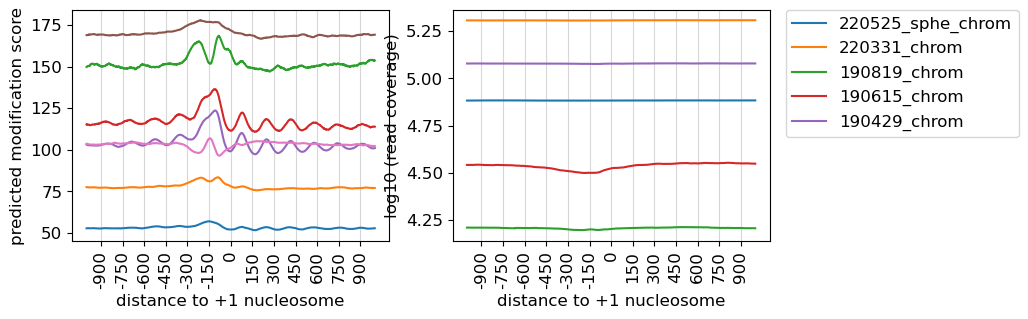

In [118]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(9,3))
cmap = plt.get_cmap('tab10')

for i in range(len(allagg_cov)):
    with open(allagg_cov[i], 'r') as infile:
        agg_scores, agg_cov = [], []
        for line in infile:
            line = line.strip().split('\t')
            agg_scores.append(float(line[1]))
            if len(line) > 2:
                agg_cov.append(float(line[2]))
        
        ax1.plot(np.arange(-hw, hw+1), agg_scores, label = labels[i], color=cmap(i), alpha=1)
        if len(line) > 2:
            ax2.plot(np.arange(-hw, hw+1), np.log10(agg_cov), label = labels[i], color=cmap(i), alpha=1)
            
x_ticks = np.concatenate((np.flip(np.arange(0, -hw-1, -space)[1:]), np.arange(0, hw+1, space)), axis=0)
ax1.grid(alpha=0.5,axis = 'x')
ax2.grid(alpha=0.5,axis = 'x')

ax1.set_xticks(x_ticks)
ax2.set_xticks(x_ticks)

# Rotate the labels by passing the same labels and setting rotation
ax1.set_xticklabels(x_ticks, rotation='vertical')
ax2.set_xticklabels(x_ticks, rotation='vertical')

ax1.set_xlabel('distance to +1 nucleosome')
ax1.set_ylabel('predicted modification score')

ax2.set_xlabel('distance to +1 nucleosome')
ax2.set_ylabel('log10 (read coverage)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig(fig_outpath+ f'3_all_read_coverage_at_nuc_window2000.pdf', bbox_inches='tight')
plt.show()
plt.close()